## Veri düzenleme

In [23]:
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import time

In [24]:
def read_coordinates_from_csv(filename):
    coordinates = []
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  #skip first line
        for row in reader:
            x, y = map(int, row[0].split())
            coordinates.append((x, y))
    return coordinates

In [25]:
def plot_coordinates_with_labels(coordinates, path=None):
    x_values = [point[0] for point in coordinates]
    y_values = [point[1] for point in coordinates]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='yellow', label='Düğümler')
    
    if path:
        # visualize the path
        path_x = [coordinates[node][0] for node in path]
        path_y = [coordinates[node][1] for node in path]
        path_x.append(path_x[0])  #  back to x beginning node
        path_y.append(path_y[0])  #  back to y beginning node
        plt.plot(path_x, path_y, color='red', linestyle='-', linewidth=1, label='En Kısa Yol')
    
    # Append node number as label
    for i, (x, y) in enumerate(coordinates):
        plt.text(x, y, str(i), color='black', fontsize=10, ha='center', va='center')
    
    plt.xlabel('X Koordinatı')
    plt.ylabel('Y Koordinatı')
    plt.title('Düğüm Koordinatları')
    plt.legend()
    plt.grid(True)
    plt.show()

## En Yakın Komşu Algoritması

In [ ]:
#başlangıç değerleri x,y kordinat düzleminde kenar değerler arasından seçilmiştir.

In [26]:
path = "./Data/tsp_51_1"  #51 node

In [27]:
coordinates=read_coordinates_from_csv(path)
#print(coordinates)

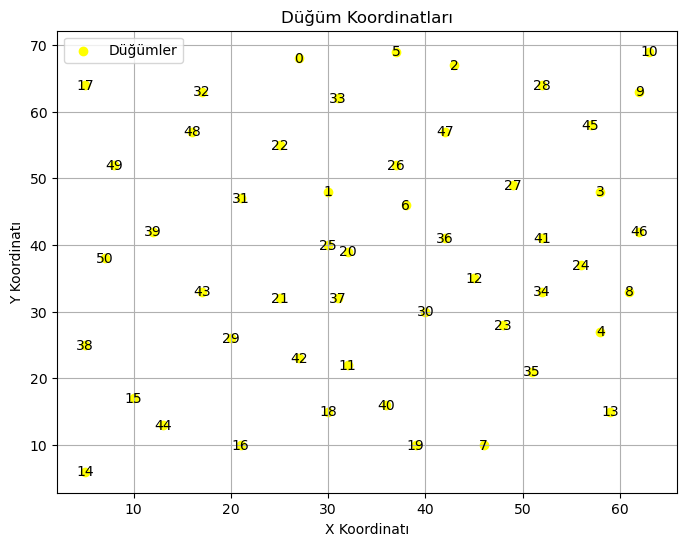

In [66]:
plot_coordinates_with_labels(coordinates)

In [43]:
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def nearest_neighbor(data, start_node):
    start_time = time.perf_counter()  # Start time for measuring execution time
    
    num_nodes = len(data)
    visited = [False] * num_nodes
    path = []
      
    current_node = start_node
    path.append(current_node)
    visited[current_node] = True
    
    # TümVisit every node
    while len(path) < num_nodes:
        min_distance = float('inf')
        nearest_node = None 
        # Find the unvisited node
        for i, node in enumerate(data):
            if not visited[i]:
                dist = distance(data[current_node], node)
                if dist < min_distance:
                    min_distance = dist
                    nearest_node = i    
        # Find the nearest node and visit and append path
        path.append(nearest_node)
        visited[nearest_node] = True
        current_node = nearest_node
    
    # Back to the beginning node
    path.append(start_node)
    total_cost = sum(distance(data[path[i]], data[path[i+1]]) for i in range(len(path)-1))
    
    end_time = time.perf_counter()  # End time for measuring execution time
    execution_time = (end_time - start_time ) # Calculate the execution time
    
    return path, total_cost, execution_time

In [29]:
start_node = 48 #best node to start path from
data = coordinates  

path, total_cost, execution_time = nearest_neighbor(data, start_node)

print("En kısa yol:", path)
print("Minimum maliyet:", total_cost)
print("İşlem süresi:", execution_time, "saniye")

En kısa yol: [48, 32, 0, 33, 5, 2, 28, 45, 9, 10, 3, 46, 24, 34, 23, 12, 36, 6, 26, 47, 27, 41, 8, 4, 35, 13, 7, 19, 40, 18, 11, 42, 29, 43, 21, 37, 20, 25, 1, 22, 31, 39, 50, 38, 15, 44, 16, 14, 30, 49, 17, 48]
Minimum maliyet: 496.4090227267278
İşlem süresi: 0.002073899988317862 saniye


In [33]:
path="./Data/tsp_100_2" #100 node
coordinates=read_coordinates_from_csv(path)
#print(coordinates)

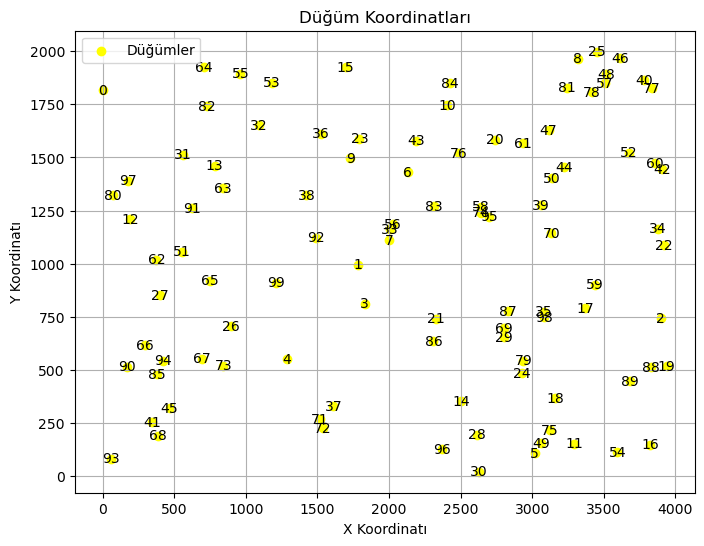

In [68]:
plot_coordinates_with_labels(coordinates)

In [34]:
data =coordinates
start_node=64 #best node to start from
path, total_cost, execution_time = nearest_neighbor(data,start_node)
print("En kısa yol:", path)
print("Minimum maliyet:", total_cost)
print("İşlem süresi:", execution_time, "saniye")

En kısa yol: [64, 82, 55, 53, 32, 13, 63, 91, 51, 62, 27, 66, 94, 85, 45, 41, 68, 93, 90, 67, 73, 26, 65, 99, 92, 38, 36, 9, 23, 15, 43, 6, 83, 56, 33, 7, 1, 3, 21, 86, 14, 28, 30, 96, 5, 49, 75, 18, 11, 54, 16, 89, 88, 19, 2, 22, 34, 42, 60, 52, 77, 40, 46, 48, 57, 78, 81, 8, 25, 47, 61, 20, 76, 10, 84, 58, 74, 95, 39, 50, 44, 70, 35, 98, 79, 24, 29, 69, 87, 17, 59, 37, 71, 72, 4, 31, 97, 80, 12, 0, 64]
Minimum maliyet: 25882.973145965363
İşlem süresi: 0.013413400010904297 saniye


In [31]:
path="./Data/tsp_783_1" #783 node
coordinates=read_coordinates_from_csv(path)
#print(coordinates)

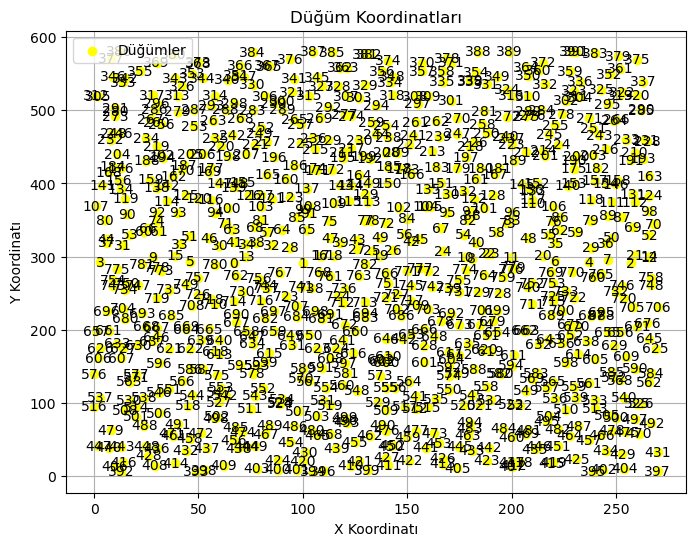

In [80]:
plot_coordinates_with_labels(coordinates)

In [37]:
data =coordinates
start_node=72 #best node to start from
path, total_cost, execution_time = nearest_neighbor(data,start_node)
print("En kısa yol:", path)
print("Minimum maliyet:", total_cost)
print("İşlem süresi:", execution_time, "saniye")

En kısa yol: [72, 144, 97, 83, 65, 122, 154, 194, 246, 285, 263, 280, 237, 158, 120, 134, 135, 190, 250, 289, 353, 377, 442, 426, 364, 312, 348, 405, 376, 305, 202, 208, 148, 115, 153, 171, 140, 88, 93, 131, 38, 2, 4441, 4446, 49, 101, 106, 70, 59, 42, 9, 60, 48, 119, 170, 215, 245, 301, 311, 290, 220, 183, 141, 143, 71, 16, 41, 44, 8, 4394, 4397, 4399, 4400, 4431, 4390, 4376, 1, 32, 36, 20, 40, 43, 82, 64, 26, 104, 69, 124, 92, 58, 15, 4419, 4423, 4339, 4301, 4225, 4184, 4144, 4097, 4054, 4126, 4122, 4089, 4083, 4102, 4048, 4013, 3996, 3975, 4045, 4060, 4131, 4093, 4037, 4008, 3951, 3911, 3895, 3816, 3783, 3755, 3705, 3700, 3750, 3778, 3807, 3860, 3898, 3933, 3956, 3979, 3983, 4031, 4065, 4099, 4146, 4191, 4239, 4237, 4185, 4142, 4075, 4042, 4023, 3988, 4006, 4072, 4091, 4119, 4080, 4061, 4028, 3994, 3904, 3843, 3795, 3738, 3740, 3744, 3688, 3648, 3624, 3589, 3548, 3545, 3516, 3466, 3438, 3416, 3362, 3346, 3303, 3259, 3227, 3186, 3128, 3080, 3030, 3031, 3035, 3073, 3118, 3140, 3123, 3

In [38]:
path="./Data/tsp_4461_1" #4461 node
coordinates=read_coordinates_from_csv(path)
#print(coordinates)

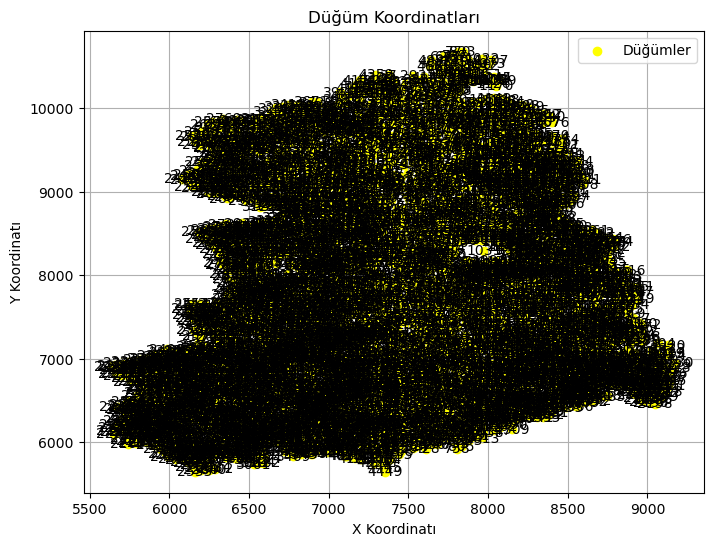

In [96]:
plot_coordinates_with_labels(coordinates)

In [39]:
data =coordinates
start_node=1899 #best node to start from
path, total_cost, execution_time = nearest_neighbor(data,start_node)
print("En kısa yol:", path)
print("Minimum maliyet:", total_cost)
print("İşlem süresi:", execution_time, "saniye")

En kısa yol: [1899, 1863, 1830, 1788, 1762, 1805, 1733, 1700, 1728, 1742, 1673, 1637, 1615, 1598, 1575, 1597, 1586, 1620, 1655, 1687, 1743, 1736, 1706, 1709, 1578, 1548, 1520, 1485, 1502, 1540, 1552, 1589, 1558, 1614, 1574, 1594, 1567, 1566, 1510, 1496, 1501, 1516, 1452, 1409, 1374, 1404, 1401, 1420, 1378, 1319, 1304, 1248, 1238, 1221, 1210, 1232, 1255, 1246, 1215, 1140, 1065, 1006, 945, 965, 1011, 973, 977, 922, 880, 867, 900, 969, 1057, 1068, 1085, 1166, 1190, 1223, 1193, 1149, 1113, 1212, 1271, 1275, 1234, 1249, 1186, 1206, 1191, 1179, 1243, 1242, 1286, 1333, 1291, 1355, 1422, 1423, 1406, 1373, 1362, 1282, 1284, 1241, 1211, 1171, 1111, 1112, 1083, 1049, 1034, 1096, 936, 920, 874, 855, 824, 859, 827, 844, 899, 944, 996, 1029, 1088, 1118, 1165, 1204, 1201, 1259, 1294, 1274, 1289, 1303, 1354, 1334, 1417, 1459, 1508, 1476, 1478, 1465, 1527, 1569, 1608, 1609, 1544, 1473, 1413, 1440, 1435, 1403, 1342, 1283, 1227, 1153, 1078, 1033, 1045, 1135, 1181, 1161, 1164, 1087, 1041, 984, 997, 952, 9

In [41]:
path="./Data/tsp_85900_1" #85900 node
coordinates=read_coordinates_from_csv(path)

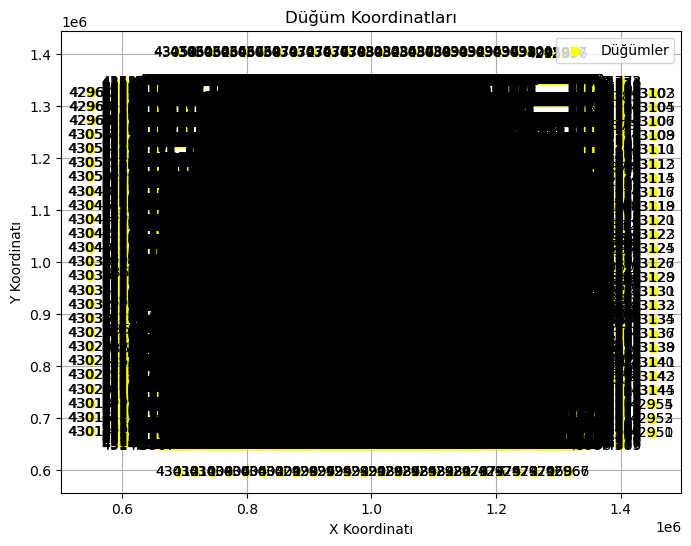

In [99]:
plot_coordinates_with_labels(coordinates)

In [42]:
data =coordinates
start_node=4301 #best node to start from
path, total_cost, execution_time = nearest_neighbor(data,start_node)
print("En kısa yol:", path)
print("Minimum maliyet:", total_cost)
print("İşlem süresi:", execution_time, "saniye")

En kısa yol: [4301, 3458, 4302, 4292, 3657, 4283, 3457, 3456, 4273, 4263, 3455, 3454, 4253, 4237, 3453, 4229, 4222, 3652, 4206, 4200, 4184, 3648, 4168, 3646, 4164, 3645, 4160, 3643, 4155, 3642, 4150, 3641, 4145, 3452, 4144, 4139, 3640, 4123, 4118, 3451, 4102, 4103, 4099, 3638, 4083, 4065, 4060, 3450, 4059, 4055, 3449, 4051, 3448, 4047, 4031, 4026, 3447, 4021, 3446, 4005, 4000, 3995, 3445, 3990, 3444, 3985, 3443, 3980, 3442, 3977, 3974, 3971, 3967, 3441, 3950, 3933, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3621, 3949, 3622, 3966, 8170, 8169, 8168, 8171, 3970, 3624, 3973, 3626, 3976, 3979, 3628, 3983, 3984, 8172, 8173, 3989, 3988, 3993, 3629, 3630, 3998, 3999, 3994, 8174, 4004, 4003, 4002, 4019, 4018, 4017, 4016, 4015, 4014, 4013, 4012, 4011, 4010, 4009, 4008, 4007, 4023, 4022, 4006, 4001, 3996, 3991, 3986, 3981, 3978, 3975, 3972, 3968, 3951, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 39